In [1]:
import pandas as pd
import numpy as np

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

import fasttext

from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

In [2]:
pd.set_option('display.max_rows', None)

In [3]:
import pandas as pd
partial_data_based_wiki_score =  pd.read_csv('partial_data_based_wiki_score.csv')
partial_data_based_wiki_score

,word,similarity
0,truck,0.735062
1,driver,0.711478
2,suv,0.573907
3,auto,0.557272
4,drove,0.551145
5,taxi,0.542710
6,jeep,0.536467
7,dealership,0.522157
8,drive,0.516160
9,motor,0.512136


In [4]:
# drop NAN
df = partial_data_based_wiki_score[partial_data_based_wiki_score['similarity'].notna()]
df

,word,similarity
0,truck,0.735062
1,driver,0.711478
2,suv,0.573907
3,auto,0.557272
4,drove,0.551145
5,taxi,0.542710
6,jeep,0.536467
7,dealership,0.522157
8,drive,0.516160
9,motor,0.512136


In [5]:
import gensim.downloader

In [6]:
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [7]:
wiki_glove_vectors = gensim.downloader.load('glove-wiki-gigaword-300')

In [8]:
df['vec'] = df['word'].apply(lambda x: wiki_glove_vectors[x])

/home/barzamini/.pyenv/versions/3.7.6/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
df

,word,similarity,vec
0,truck,0.735062,"[0.080162, 0.16016, -0.015111, -0.29049, -0.53..."
1,driver,0.711478,"[0.13836, -0.26681, 0.29052, -0.41012, -0.3165..."
2,suv,0.573907,"[0.12936, 0.3369, 0.01622, 0.055252, -0.29762,..."
3,auto,0.557272,"[0.79371, 0.76901, -0.42267, -0.47473, 0.00571..."
4,drove,0.551145,"[0.043403, 0.047728, 0.095954, 0.27798, 0.2828..."
5,taxi,0.542710,"[0.2904, -0.4638, 0.25637, -0.23115, -0.12298,..."
6,jeep,0.536467,"[-0.30038, 0.171, -0.02949, 0.19344, -0.27893,..."
7,dealership,0.522157,"[0.075422, 0.81716, -0.48315, 0.048517, -0.106..."
8,drive,0.516160,"[0.015801, 0.40797, -0.23569, -0.023067, 0.388..."
9,motor,0.512136,"[0.22075, 0.16854, -0.045284, -0.24672, -0.554..."


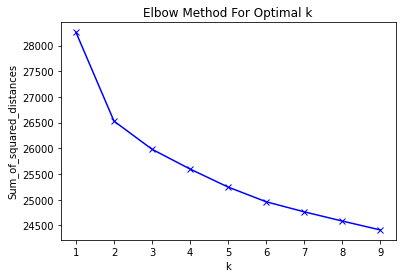

In [10]:
# Elbow Method to define number of k for the clustering
sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(pd.DataFrame(df['vec'].values.tolist()))
    sum_of_squared_distances.append(km.inertia_)

# Plot it
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [11]:
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(df['vec'].values.tolist())
df

/home/barzamini/.pyenv/versions/3.7.6/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,word,similarity,vec,cluster
0,truck,0.735062,"[0.080162, 0.16016, -0.015111, -0.29049, -0.53...",0
1,driver,0.711478,"[0.13836, -0.26681, 0.29052, -0.41012, -0.3165...",0
2,suv,0.573907,"[0.12936, 0.3369, 0.01622, 0.055252, -0.29762,...",0
3,auto,0.557272,"[0.79371, 0.76901, -0.42267, -0.47473, 0.00571...",2
4,drove,0.551145,"[0.043403, 0.047728, 0.095954, 0.27798, 0.2828...",0
5,taxi,0.542710,"[0.2904, -0.4638, 0.25637, -0.23115, -0.12298,...",0
6,jeep,0.536467,"[-0.30038, 0.171, -0.02949, 0.19344, -0.27893,...",0
7,dealership,0.522157,"[0.075422, 0.81716, -0.48315, 0.048517, -0.106...",1
8,drive,0.516160,"[0.015801, 0.40797, -0.23569, -0.023067, 0.388...",0
9,motor,0.512136,"[0.22075, 0.16854, -0.045284, -0.24672, -0.554...",0


In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
df['x'] = pca.fit_transform(df['vec'].values.tolist())[:,0]
df['y'] = pca.fit_transform(df['vec'].values.tolist())[:,1]
df['z'] = pca.fit_transform(df['vec'].values.tolist())[:,2]

/home/barzamini/.pyenv/versions/3.7.6/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/barzamini/.pyenv/versions/3.7.6/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/barzamini/.pyenv/versions/3.7.6/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

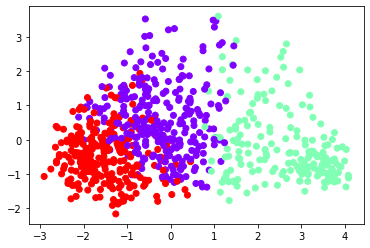

In [15]:
import matplotlib.pyplot as plt

plt.scatter(df['x'], df['y'], c=df['cluster'], cmap='rainbow')

In [16]:
df[df['cluster'] == 0]

,word,similarity,vec,cluster,x,y,z
0,truck,0.735062,"[0.080162, 0.16016, -0.015111, -0.29049, -0.53...",0,-0.581021,3.514882,0.865490
1,driver,0.711478,"[0.13836, -0.26681, 0.29052, -0.41012, -0.3165...",0,-0.837358,1.809376,1.629845
2,suv,0.573907,"[0.12936, 0.3369, 0.01622, 0.055252, -0.29762,...",0,1.040883,3.453866,0.518215
4,drove,0.551145,"[0.043403, 0.047728, 0.095954, 0.27798, 0.2828...",0,-0.503228,1.484517,1.350236
5,taxi,0.542710,"[0.2904, -0.4638, 0.25637, -0.23115, -0.12298,...",0,0.286492,1.851871,1.556249
6,jeep,0.536467,"[-0.30038, 0.171, -0.02949, 0.19344, -0.27893,...",0,1.005723,3.278186,1.479960
8,drive,0.516160,"[0.015801, 0.40797, -0.23569, -0.023067, 0.388...",0,-1.407625,1.539674,-0.153925
9,motor,0.512136,"[0.22075, 0.16854, -0.045284, -0.24672, -0.554...",0,-0.480583,3.031676,1.162759
10,wheel,0.508198,"[0.27593, -0.14595, 0.25877, -0.79508, 0.07151...",0,-0.050116,3.198883,-0.814832
11,bomb,0.502516,"[0.33686, 0.23996, -0.34485, -0.57554, -0.5588...",0,-1.140907,1.321053,0.685707


In [17]:
df[df['cluster'] == 1]

,word,similarity,vec,cluster,x,y,z
7,dealership,0.522157,"[0.075422, 0.81716, -0.48315, 0.048517, -0.106...",1,1.190339,2.035602,1.535571
12,minivan,0.501412,"[0.0060542, 0.29735, 0.16915, 0.043863, -0.010...",1,1.505690,2.885804,0.913997
13,sedan,0.496989,"[-0.1781, 0.51891, -0.20241, -0.13818, 0.14879...",1,1.094733,3.594327,1.219583
27,cadillac,0.409007,"[-0.15085, 0.58722, -0.1542, 0.26001, -0.22584...",1,1.189285,2.415311,1.241389
29,getaway,0.407191,"[-0.24246, -0.56473, -0.2274, 0.14554, 0.44213...",1,1.308308,1.253038,0.831874
34,jaguar,0.390164,"[0.51815, 0.68399, -0.22203, -0.28671, -0.5456...",1,1.361989,1.728504,1.252349
65,roadster,0.344821,"[0.51569, 0.48485, -0.42782, -0.66457, -0.2078...",1,2.532246,2.402011,0.386529
66,saloon,0.343377,"[0.1043, 0.72451, -0.2371, -0.38638, -0.23455,...",1,1.770035,2.031724,1.110664
73,chauffeur,0.335573,"[0.18404, 0.24947, -0.38402, 0.14751, -0.15732...",1,2.010313,0.448620,1.505853
96,fiat,0.316595,"[0.10155, 0.56347, -0.1718, -0.22605, -0.47642...",1,0.873545,1.413177,1.037307


In [18]:
df[df['cluster'] == 2]

,word,similarity,vec,cluster,x,y,z
3,auto,0.557272,"[0.79371, 0.76901, -0.42267, -0.47473, 0.00571...",2,-0.707072,1.931892,1.077837
14,ford,0.487261,"[0.15882, 0.26298, -0.42376, -0.052476, -0.071...",2,-0.660221,1.711358,1.885253
26,one,0.411025,"[-0.36756, 0.395, -0.27034, -0.14817, -0.02637...",2,-2.513628,-0.086489,0.477214
28,speed,0.408913,"[0.023731, 0.38334, 0.104, -0.13609, 0.064565,...",2,-1.478746,1.504616,-0.844974
32,model,0.393366,"[-0.53858, 0.486, -0.043436, -0.40952, 0.15884...",2,-0.877150,1.581650,0.495389
37,phone,0.380520,"[-0.83676, 0.02264, -0.26628, 0.066996, -0.080...",2,-1.565143,-0.146227,0.347258
38,sport,0.377526,"[0.34566, 0.15934, 0.48444, -0.13693, 0.18737,...",2,-0.870572,1.035043,0.662605
41,stop,0.376272,"[0.80465, 0.051994, 0.078946, -0.10883, -0.461...",2,-1.751812,-0.110660,0.020367
45,market,0.367386,"[-0.17645, -0.10193, -0.14548, 0.18068, 0.3769...",2,-2.245965,0.821624,-0.465590
48,get,0.362915,"[-0.14124, -0.11836, -0.30782, 0.098416, 0.223...",2,-2.459689,-0.846193,-1.066476
